In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import sys
import sklearn
from tensorflow import keras
import tensorflow as tf
%matplotlib inline

In [2]:
input_dir = "./data/10-monkey-species"
train_dir = input_dir + "/training/training"
valid_dir = input_dir + "/validation/validation"
label_file =  input_dir + "/monkey_labels.txt"

print(os.path.exists(input_dir))
print(os.path.exists(train_dir))
print(os.path.exists(valid_dir))
print(os.path.exists(label_file))

True
True
True
True


In [3]:
labels = pd.read_csv(label_file, header=0)
print(labels)

   Label     Latin Name              Common Name                     \
0  n0         alouatta_palliata\t    mantled_howler                   
1  n1        erythrocebus_patas\t    patas_monkey                     
2  n2        cacajao_calvus\t        bald_uakari                      
3  n3        macaca_fuscata\t        japanese_macaque                 
4  n4       cebuella_pygmea\t        pygmy_marmoset                   
5  n5       cebus_capucinus\t        white_headed_capuchin            
6  n6       mico_argentatus\t        silvery_marmoset                 
7  n7      saimiri_sciureus\t        common_squirrel_monkey           
8  n8       aotus_nigriceps\t        black_headed_night_monkey        
9  n9       trachypithecus_johnii    nilgiri_langur                   

    Train Images    Validation Images  
0             131                  26  
1             139                  28  
2             137                  27  
3             152                  30  
4             131 

In [4]:
height = 224
width = 224
channels = 3
batch_size = 16
num_classes = 10

train_datagenerParams = keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range = 0.2,
    horizontal_flip= True,
    fill_mode='nearest', 
)

train_datagenerator = train_datagenerParams.flow_from_directory(train_dir,
                                                           target_size = (height, width),
                                                           batch_size = batch_size,
                                                           seed = 1024,
                                                           shuffle = True,
                                                           class_mode = "categorical")

valid_datagenerParams = keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)
valid_datagenerator = train_datagenerParams.flow_from_directory(valid_dir,
                                                           target_size = (height, width),
                                                           batch_size = batch_size,
                                                           seed = 1024,
                                                           shuffle = True,
                                                           class_mode = "categorical")

num_train = train_datagenerator.samples
num_valid = valid_datagenerator.samples
print(num_train, num_valid)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
1098 272


In [11]:
model = keras.models.Sequential([   
    keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = (height, width, channels)),
    keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(strides=2, padding="valid"),
    
    keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(strides=2, padding="valid"),
    
    keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'),
    keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(strides=2, padding="valid"),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(num_classes, activation = 'softmax'),
])

model.compile(loss = "categorical_crossentropy",
              opentimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 56, 56, 128)      

In [12]:
epochs = 300
history = model.fit_generator(train_datagenerator,
                              steps_per_epoch= num_train // batch_size,
                              epochs= epochs,
                              validation_data=valid_datagenerator,
                              validation_steps= num_valid // batch_size)

Epoch 1/300
68/68 [==============================] - 44s 651ms/step - loss: 2.7250 - accuracy: 0.1035 - val_loss: 2.3027 - val_accuracy: 0.1029
Epoch 2/300
68/68 [==============================] - 39s 581ms/step - loss: 2.3221 - accuracy: 0.1081 - val_loss: 2.2803 - val_accuracy: 0.1176
Epoch 3/300
68/68 [==============================] - 39s 578ms/step - loss: 2.3464 - accuracy: 0.1516 - val_loss: 2.2283 - val_accuracy: 0.1397
Epoch 4/300
68/68 [==============================] - 40s 582ms/step - loss: 2.2004 - accuracy: 0.2181 - val_loss: 2.2301 - val_accuracy: 0.1287
Epoch 5/300
68/68 [==============================] - 40s 583ms/step - loss: 2.0049 - accuracy: 0.2726 - val_loss: 1.9181 - val_accuracy: 0.3015
Epoch 6/300
68/68 [==============================] - 40s 584ms/step - loss: 1.7901 - accuracy: 0.3697 - val_loss: 1.6930 - val_accuracy: 0.3824
Epoch 7/300
68/68 [==============================] - 40s 583ms/step - loss: 1.6526 - accuracy: 0.4140 - val_loss: 1.4523 - val_accuracy:

68/68 [==============================] - 42s 621ms/step - loss: 0.6129 - accuracy: 0.8178 - val_loss: 0.9874 - val_accuracy: 0.7059
Epoch 58/300
68/68 [==============================] - 42s 621ms/step - loss: 0.6018 - accuracy: 0.7957 - val_loss: 1.2462 - val_accuracy: 0.7316
Epoch 59/300
68/68 [==============================] - 42s 618ms/step - loss: 0.6079 - accuracy: 0.8199 - val_loss: 0.9303 - val_accuracy: 0.7353
Epoch 60/300
68/68 [==============================] - 42s 622ms/step - loss: 0.5412 - accuracy: 0.8078 - val_loss: 0.8060 - val_accuracy: 0.7794
Epoch 61/300
68/68 [==============================] - 43s 628ms/step - loss: 0.5953 - accuracy: 0.8115 - val_loss: 0.9343 - val_accuracy: 0.7169
Epoch 62/300
68/68 [==============================] - 42s 619ms/step - loss: 0.5493 - accuracy: 0.8198 - val_loss: 0.8900 - val_accuracy: 0.7500
Epoch 63/300
68/68 [==============================] - 42s 623ms/step - loss: 0.6626 - accuracy: 0.8068 - val_loss: 1.1061 - val_accuracy: 0.713

68/68 [==============================] - 41s 604ms/step - loss: 0.4601 - accuracy: 0.8734 - val_loss: 0.9771 - val_accuracy: 0.7610
Epoch 114/300
68/68 [==============================] - 40s 591ms/step - loss: 0.5258 - accuracy: 0.8466 - val_loss: 0.9664 - val_accuracy: 0.8015
Epoch 115/300
68/68 [==============================] - 41s 596ms/step - loss: 0.4887 - accuracy: 0.8623 - val_loss: 0.9789 - val_accuracy: 0.7610
Epoch 116/300
68/68 [==============================] - 40s 596ms/step - loss: 0.5418 - accuracy: 0.8383 - val_loss: 1.0634 - val_accuracy: 0.7721
Epoch 117/300
68/68 [==============================] - 41s 601ms/step - loss: 0.5469 - accuracy: 0.8420 - val_loss: 0.9718 - val_accuracy: 0.7941
Epoch 118/300
68/68 [==============================] - 41s 598ms/step - loss: 0.4003 - accuracy: 0.8799 - val_loss: 1.4139 - val_accuracy: 0.6912
Epoch 119/300
68/68 [==============================] - 40s 593ms/step - loss: 0.5015 - accuracy: 0.8521 - val_loss: 1.4079 - val_accuracy:

KeyboardInterrupt: 

In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [8]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data["val_" + label] = history.history["val_" + label]
    pd.DataFrame(data).plot(figsize = (8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()

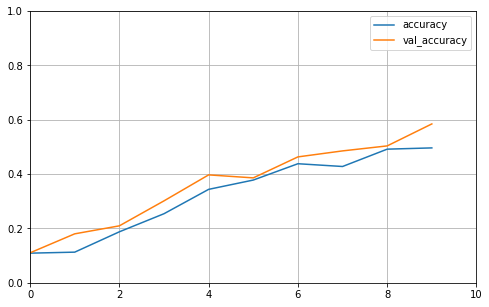

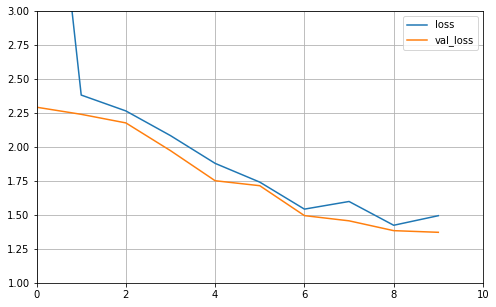

In [17]:
plot_learning_curves(history, "accuracy", epochs, 0, 1)
plot_learning_curves(history, "loss", epochs, 1, 3)

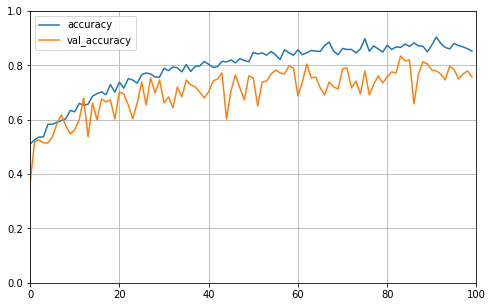

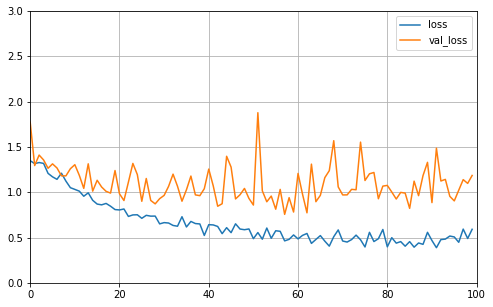

In [20]:
# 教程网络
plot_learning_curves(history, "accuracy", epochs, 0, 1)
plot_learning_curves(history, "loss", epochs, 0, 3)

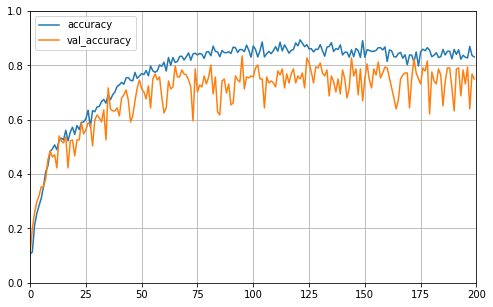

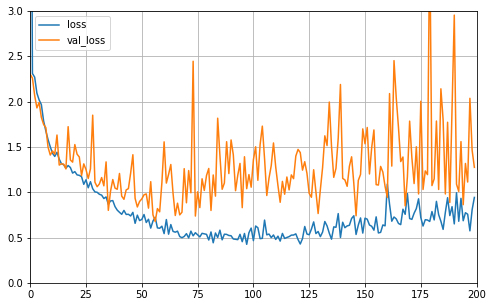

In [9]:
# 增加了新一层网络
plot_learning_curves(history, "accuracy", epochs, 0, 1)
plot_learning_curves(history, "loss", epochs, 0, 3)

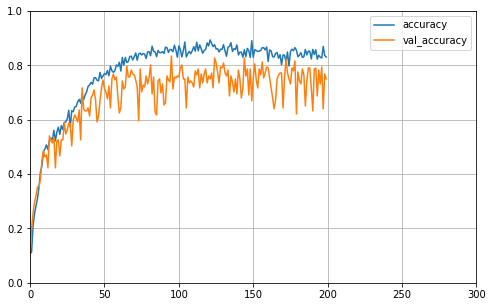

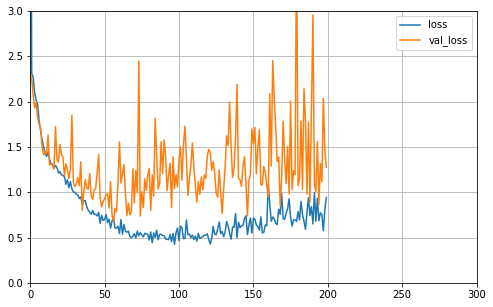

In [13]:
# 减少了Dense层的神经元个数
plot_learning_curves(history, "accuracy", epochs, 0, 1)
plot_learning_curves(history, "loss", epochs, 0, 3)